In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('../input/Patient Data.csv')
data.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [3]:
data.isna().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

In [4]:
data.shape

(100000, 8)

In [5]:
data['smoking history'].unique()

array(['never', nan, 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [6]:
import pandas_profiling

/opt/conda/lib/python3.6/site-packages/pandas_profiling/plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packag

In [7]:
pandas_profiling.ProfileReport(data)

Number of variables,8
Number of observations,100000
Total Missing (%),7.7%
Total size in memory,6.1 MiB
Average record size in memory,64.0 B
Numeric,2
Categorical,2
Boolean,4
Date,0
Text (Unique),0
Rejected,0


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

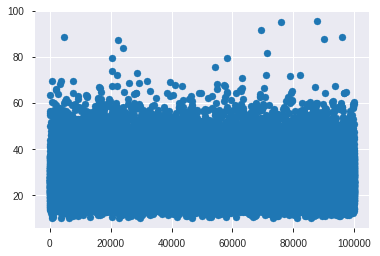

In [9]:
plt.scatter(data.index,data.BMI)

In [10]:
data['smoking history']=data['smoking history'].fillna('Unknown')

In [11]:
data['smoking history'].value_counts()

Unknown        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking history, dtype: int64

In [12]:
data['smoking history'].unique()

array(['never', 'Unknown', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [13]:
data.dtypes

gender              object
age                float64
diabetes             int64
hypertension         int64
stroke               int64
heart disease        int64
smoking history     object
BMI                float64
dtype: object

In [14]:
data.isna().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history        0
BMI                25444
dtype: int64

In [15]:
data.duplicated().sum()

27057

In [16]:
data_without_Null=data.dropna()

In [17]:
data_without_Null.shape

(74556, 8)

In [18]:
data_without_Null.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14
6,Female,44.0,1,0,0,0,never,19.31
7,Female,79.0,0,0,0,0,Unknown,23.86


In [19]:
data_without_Null.reset_index(inplace=True)

In [20]:
data_without_Null.drop('index',axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
train_cat=data_without_Null.select_dtypes(include=[object])

In [22]:
train_num=data_without_Null.select_dtypes(exclude=[object])

In [23]:
train_cat=pd.get_dummies(train_cat, columns=train_cat.columns, drop_first=True)

In [24]:
train_df=pd.concat([train_cat,train_num],axis=1)

In [25]:
train_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,stroke,heart disease,BMI
0,0,0,0,0,0,1,0,80.0,0,0,0,1,25.19
1,0,0,1,0,0,0,0,36.0,0,0,0,0,23.45
2,1,0,1,0,0,0,0,76.0,0,1,0,1,20.14
3,0,0,0,0,0,1,0,44.0,1,0,0,0,19.31
4,0,0,0,0,0,0,0,79.0,0,0,0,0,23.86


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X=train_df.drop(['BMI'],axis=1)
y=train_df['BMI']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [29]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet
import numpy as np

In [30]:
lm_lasso=Lasso()
lm_ridge=Ridge()
lm_elasticnet=ElasticNet()

In [31]:
lm_lasso.fit(X_train,y_train)
lm_ridge.fit(X_train,y_train)
lm_elasticnet.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [32]:
print("RSquare for Lasso:", np.round(lm_lasso.score(X_test,y_test)*100,2))
print("RSquare for Ridge:", np.round(lm_ridge.score(X_test,y_test)*100,2))
print("RSquare for Elastic-Net:", np.round(lm_elasticnet.score(X_test,y_test)*100,2))

RSquare for Lasso: 14.68
RSquare for Ridge: 19.04
RSquare for Elastic-Net: 14.68


In [33]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn import metrics 

In [34]:
regressor = DecisionTreeRegressor()  
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
y_pred =regressor.predict(X_test)

In [36]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 6.588383760749766


In [37]:
train_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,stroke,heart disease,BMI
0,0,0,0,0,0,1,0,80.0,0,0,0,1,25.19
1,0,0,1,0,0,0,0,36.0,0,0,0,0,23.45
2,1,0,1,0,0,0,0,76.0,0,1,0,1,20.14
3,0,0,0,0,0,1,0,44.0,1,0,0,0,19.31
4,0,0,0,0,0,0,0,79.0,0,0,0,0,23.86


In [38]:
import pandas as pd
import numpy as np
data=pd.read_csv('../input/Patient Data.csv')
data.head()

,gender,age,diabetes,hypertension,stroke,heart disease,smoking history,BMI
0,Female,80.0,0,0,0,1,never,25.19
1,Female,54.0,0,0,0,0,NaN,NaN
2,Male,28.0,0,0,0,0,never,NaN
3,Female,36.0,0,0,0,0,current,23.45
4,Male,76.0,0,1,0,1,current,20.14


In [39]:
data.isna().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history    35816
BMI                25444
dtype: int64

In [40]:
data.shape

(100000, 8)

In [41]:
data['smoking history'].unique()

array(['never', nan, 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [42]:
data['smoking history']=data['smoking history'].fillna('Unknown')

In [43]:
data['smoking history'].value_counts()

Unknown        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking history, dtype: int64

In [44]:
data['smoking history'].unique()

array(['never', 'Unknown', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [45]:
data.dtypes

gender              object
age                float64
diabetes             int64
hypertension         int64
stroke               int64
heart disease        int64
smoking history     object
BMI                float64
dtype: object

In [46]:
data.isna().sum()

gender                 0
age                    0
diabetes               0
hypertension           0
stroke                 0
heart disease          0
smoking history        0
BMI                25444
dtype: int64

In [47]:
train_data_cat=data.select_dtypes(include=[object])
train_data_num=data.select_dtypes(exclude=[object])
train_data_cat=pd.get_dummies(train_data_cat, columns=train_data_cat.columns, drop_first=True)
data_df=pd.concat([train_data_cat,train_data_num],axis=1)

In [48]:
data_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,stroke,heart disease,BMI
0,0,0,0,0,0,1,0,80.0,0,0,0,1,25.19
1,0,0,0,0,0,0,0,54.0,0,0,0,0,NaN
2,1,0,0,0,0,1,0,28.0,0,0,0,0,NaN
3,0,0,1,0,0,0,0,36.0,0,0,0,0,23.45
4,1,0,1,0,0,0,0,76.0,0,1,0,1,20.14


In [49]:
data_df.shape

(100000, 13)

In [50]:
from fancyimpute import IterativeImputer

Using TensorFlow backend.


In [51]:
XY_incomplete = data_df.copy()

In [52]:
data_complete_df = pd.DataFrame(IterativeImputer(n_iter=5, sample_posterior=True, random_state=8).fit_transform(XY_incomplete))

In [53]:
data_complete_df.columns=data_df.columns

In [54]:
data_complete_df.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,stroke,heart disease,BMI
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,0.0,0.0,1.0,25.190000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,25.725620
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,0.0,0.0,30.634818
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,23.450000
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,0.0,1.0,0.0,1.0,20.140000


In [55]:
data_complete_df['diabetes & hypertension']=data_complete_df['diabetes']*data_complete_df['hypertension']
data_complete_df['diabetes & srtoke']=data_complete_df['diabetes']*data_complete_df['stroke']
data_complete_df['diabetes & heart disease']=data_complete_df['diabetes']*data_complete_df['heart disease']
data_complete_df['hypertension & stroke']=data_complete_df['hypertension']*data_complete_df['stroke']
data_complete_df['hypertension & heart disease']=data_complete_df['hypertension']*data_complete_df['heart disease']
data_complete_df['stroke & heart disease']=data_complete_df['stroke']*data_complete_df['heart disease']

In [56]:
data_complete_df['diabetes,hypertension,stroke']=data_complete_df['diabetes']*data_complete_df['hypertension']*data_complete_df['stroke']
data_complete_df['diabetes,hypertension,heart disease']=data_complete_df['diabetes']*data_complete_df['hypertension']*data_complete_df['heart disease']
data_complete_df['hypertension,stroke,heart disease']=data_complete_df['hypertension']*data_complete_df['stroke']*data_complete_df['heart disease']

In [57]:
data_complete_df.shape

(100000, 22)

In [58]:
data_complete_df['diabetes & hypertension'].value_counts()

0.0    97912
1.0     2088
Name: diabetes & hypertension, dtype: int64

In [59]:
data_complete_df['hypertension,stroke,heart disease'].value_counts()

0.0    99920
1.0       80
Name: hypertension,stroke,heart disease, dtype: int64

In [60]:
dataaa=data_complete_df[data_complete_df['hypertension,stroke,heart disease']==1]

In [61]:
dataaa.shape

(80, 22)

In [62]:
dataaa['age'].value_counts()

80.0    25
70.0     6
71.0     5
78.0     4
76.0     4
77.0     3
73.0     3
67.0     3
75.0     3
51.0     2
68.0     2
52.0     2
60.0     2
65.0     2
79.0     2
45.0     1
58.0     1
69.0     1
55.0     1
62.0     1
57.0     1
74.0     1
64.0     1
61.0     1
72.0     1
50.0     1
66.0     1
Name: age, dtype: int64

In [63]:
data_complete_df['diabetes,hypertension,heart disease'].value_counts()

0.0    99642
1.0      358
Name: diabetes,hypertension,heart disease, dtype: int64

In [64]:
data_complete_df['diabetes,hypertension,stroke'].value_counts()

0.0    99870
1.0      130
Name: diabetes,hypertension,stroke, dtype: int64

In [65]:
data_complete_df['diabetes & heart disease'].value_counts()

0.0    98733
1.0     1267
Name: diabetes & heart disease, dtype: int64

In [66]:
data_complete_df['diabetes & hypertension'].value_counts()

0.0    97912
1.0     2088
Name: diabetes & hypertension, dtype: int64

In [67]:
data_complete_df['diabetes & srtoke'].value_counts()

0.0    99594
1.0      406
Name: diabetes & srtoke, dtype: int64

In [68]:
data_complete_df['hypertension & heart disease'].value_counts()

0.0    99084
1.0      916
Name: hypertension & heart disease, dtype: int64

In [69]:
data_complete_df['hypertension & stroke'].value_counts()

0.0    99651
1.0      349
Name: hypertension & stroke, dtype: int64

In [70]:
data_complete_df['stroke & heart disease'].value_counts()

0.0    99708
1.0      292
Name: stroke & heart disease, dtype: int64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_stroke=data_complete_df.drop(['stroke'],axis=1)
X_stroke.head()

,gender_Male,gender_Other,smoking history_current,smoking history_ever,smoking history_former,smoking history_never,smoking history_not current,age,diabetes,hypertension,heart disease,BMI,diabetes & hypertension,diabetes & srtoke,diabetes & heart disease,hypertension & stroke,hypertension & heart disease,stroke & heart disease,"diabetes,hypertension,stroke","diabetes,hypertension,heart disease","hypertension,stroke,heart disease"
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,80.0,0.0,0.0,1.0,25.190000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,25.725620,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,28.0,0.0,0.0,0.0,30.634818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,36.0,0.0,0.0,0.0,23.450000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,76.0,0.0,1.0,1.0,20.140000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [73]:
Y_stroke=data_complete_df['stroke']
Y_stroke.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: stroke, dtype: float64

In [74]:
X_train,X_test,Y_train,Y_test=train_test_split(X_stroke,Y_stroke,test_size=0.2,random_state=123)

In [75]:
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn import linear_model

In [76]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [77]:
las = linear_model.Lasso(alpha=0.1)

In [78]:
las.fit(X_train,Y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
y_predlas=las.predict(X_test)

In [80]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [81]:
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, y_predlas))
print('Mean Squared Error', metrics.mean_squared_error(Y_test, y_predlas))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test, y_predlas)))

Mean Absolute Error 0.029151633304333024
Mean Squared Error 0.013629048373566124
Root Mean Squared Error 0.11674351533839523


In [82]:
r2_score(Y_test, y_predlas)

0.019576858271405206

In [83]:
from sklearn.datasets import make_regression

In [84]:
regr = ElasticNetCV(cv=5, random_state=123)
regr.fit(X_train, Y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
       normalize=False, positive=False, precompute='auto',
       random_state=123, selection='cyclic', tol=0.0001, verbose=0)

In [85]:
print(regr.alpha_)

0.0007663713023999996


In [86]:
y_predels=regr.predict(X_test)

In [87]:
print('Mean Absolute Error', metrics.mean_absolute_error(Y_test, y_predels))
print('Mean Squared Error', metrics.mean_squared_error(Y_test, y_predels))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(Y_test, y_predels)))

Mean Absolute Error 0.02034346711660877
Mean Squared Error 0.007991975445253463
Root Mean Squared Error 0.08939784922051236


In [88]:
r2_score(Y_test,y_predels)

0.4250869569257407